* Kamil Łangowski 
* Szymon Pawłowski  
* Przemysław Koden 

In [1]:
import numpy as np
import math 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#WIZUALIZACJA

In [2]:
def vis(fun, sklejana, N, m, p):
  name = fun.__name__
  number = str(N)

  points = list(np.arange(0,11,0.1))
  values = [0]*len(points)
  for i in range(len(points)):
    values[i] = sklejana(x = points[i], n = N, func = fun, times = m)
    
  values_p = [0]*len(p)
  for i in range(len(p)):
    values_p[i] = sklejana(x = p[i], n = N, func = fun, times = m)

  fig, ax = plt.subplots()
  fig.set_size_inches(11.7, 8.27)
  
  k = sns.lineplot(x=points, y=values, color="orangered")
  sns.scatterplot(x=p, y=values_p,s=30, color="orangered")
  plt.axhline(y=0, color='black', linestyle='-')
  k.yaxis.grid()
  
  plt.xticks(fontsize=15, color="black")
  plt.yticks(fontsize=15)
  plt.title("Funkcja sklejana dla y="+name+" dla N="+number, fontsize=15,  fontweight='bold');

#Rozwiązanie układu (2) za pomocą algorytmu dla układu trójprzekątniowego

In [3]:
 n = 10

 t=[0] * (n+1)
 y=[0] * (n+1)
 z=[0] * (n+1)

 h=[0] * n
 b=[0] * n

 u=[0] * (n-1)
 v=[0] * (n-1)

for i in range(0,n+1):
  t[i]=i
  y[i]=math.cos(i)
for i in range(0,n):
  h[i]=t[i+1]-t[i]
  b[i]=6*(y[i+1]-y[i])/h[i]


u[0]=2*(h[0]+h[1])
v[0]=b[1]-b[0]

for i in range(1,n-1):
  u[i]=2*(h[i]+h[i+1])-h[i]*h[i]/u[i-1]
  v[i]=b[i+1]-b[i]-h[i]*v[i-1]/u[i-1]
 

z[n]=0

for i in range(n-1, 0, -1):
  z[i]=(v[i-1]-h[i]*z[i+1])/u[i-1]

z[0]=0

print(z)

[0, -0.8775698862733329, 0.5297708553928008, 1.054107358874004, 0.7149669238520031, -0.30823347074198837, -1.0468192717222407, -0.8011462433342551, 0.0925987099901206, 1.2333837638289016, 0]


#Program obliczający funkcje sklejane 3 stopnia

In [4]:
def s(x,n,func,times):
  si = 0

  t=[0] * (n+1)
  y=[0] * (n+1)
  z=[0] * (n+1)
  
  h=[0] * n
  b=[0] * n
  
  u=[0] * (n-1)
  v=[0] * (n-1)
  for i in range(0,n+1):
    t[i]=times * i
    y[i]=func(t[i])
  for i in range(0,n):
    h[i]=t[i+1]-t[i]
    b[i]=6*(y[i+1]-y[i])/h[i]
  
  u[0]=2*(h[0]+h[1])
  v[0]=b[1]-b[0]
  
  for i in range(1,n-1):
    u[i]=2*(h[i]+h[i+1])-h[i]*h[i]/u[i-1]
    v[i]=b[i+1]-b[i]-h[i]*v[i-1]/u[i-1]
    
  z[n]=0
  
  for i in range(n-1, 0, -1):
    z[i]=(v[i-1]-h[i]*z[i+1])/u[i-1]
    
  z[0]=0

  for i in range(n-1,-1,-1):
      if (x-t[i] >= 0):
        idx = i
        break
      else: 
        idx = n-1

  si = z[idx] / (6*h[idx]) * (t[idx+1] - x)**3 + z[idx+1]/(6*h[idx]) * (x-t[idx])**3 + (y[idx+1]/h[idx] - z[idx+1]*h[idx]/6)*(x - t[i]) + (y[idx]/h[idx] - z[idx]*h[idx]/6)*(t[i+1] - x)  
  return si

In [5]:
s(x=9,n=30,func=math.sqrt,times=0.25)

3.0499308503626743

# **TEST** kodu dla funkcji sqrt(x)

In [6]:
p=[]
for i in range(0,11):
  p.append(i)
  print(i,s(x = i, n = 30, func = math.sqrt, times=0.25))

0 0.0
1 1.0
2 1.4142135623730951
3 1.7320508075688772
4 2.0
5 2.23606797749979
6 2.449489742783178
7 2.6457513110645907
8 2.831677434273999
9 3.0499308503626743
10 3.364556634228375


Wizualizacja

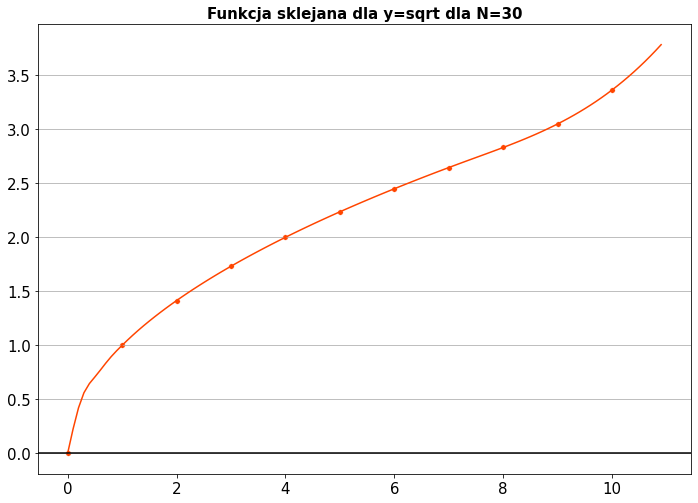

In [7]:
vis(fun=math.sqrt, sklejana=s, N=30, m=0.25, p=p)

# **TEST** kodu dla funkcji cos(x)

In [8]:
p=[]
for i in range(10):
  p.append(i)
  print(i,s(x = i, n = 10, func = math.cos, times=1))

0 1.0
1 0.5403023058681398
2 -0.41614683654714246
3 -0.9899924966004454
4 -0.6536436208636119
5 0.28366218546322625
6 0.960170286650366
7 0.7539022543433046
8 -0.14550003380861354
9 -0.9111302618846768


Wizualizacja

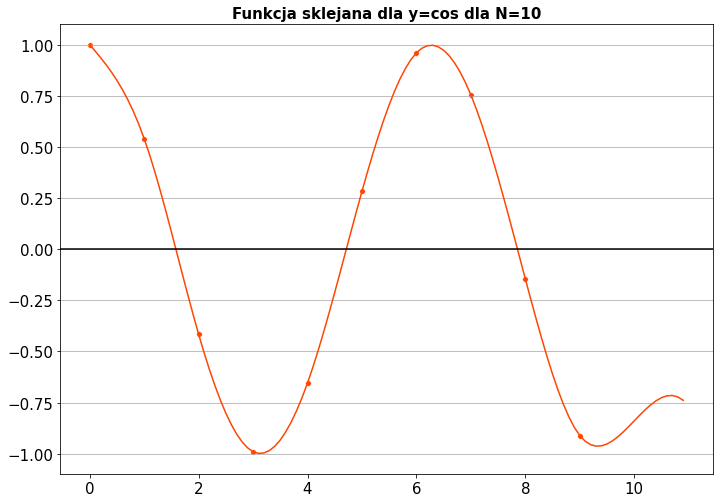

In [9]:
vis(fun=math.cos, sklejana=s, N=10, m=1, p=p)

*Program generujący różne odstępy między kolejnymi węzłami*

In [10]:
def s_diff(x,n,func,times):
  si = 0

  t=[0] * (n+1)
  y=[0] * (n+1)
  z=[0] * (n+1)
  
  h=[0] * n
  b=[0] * n
  
  u=[0] * (n-1)
  v=[0] * (n-1)
  
  t[0]=times*0
  y[0]=func(t[0])
  for i in range(1,n+1):
    t[i]=times * i + t[i-1]
    y[i]=func(t[i])
  for i in range(0,n):
    h[i]=t[i+1]-t[i]
    b[i]=6*(y[i+1]-y[i])/h[i]
  
  u[0]=2*(h[0]+h[1])
  v[0]=b[1]-b[0]
  
  for i in range(1,n-1):
    u[i]=2*(h[i]+h[i+1])-h[i]*h[i]/u[i-1]
    v[i]=b[i+1]-b[i]-h[i]*v[i-1]/u[i-1]
    
  z[n]=0
  
  for i in range(n-1, 0, -1):
    z[i]=(v[i-1]-h[i]*z[i+1])/u[i-1]
    
  z[0]=0

  for i in range(n-1,-1,-1):
      if (x-t[i] >= 0):
        idx = i
        break
      else: 
        idx = n-1

  si = z[idx] / (6*h[idx]) * (t[idx+1] - x)**3 + z[idx+1]/(6*h[idx]) * (x-t[idx])**3 + (y[idx+1]/h[idx] - z[idx+1]*h[idx]/6)*(x - t[i]) + (y[idx]/h[idx] - z[idx]*h[idx]/6)*(t[i+1] - x)  
  return si

# **TEST** kodu dla funkcji cos(x) o różnej długości węzłów

In [11]:
p=[]
for i in range(10):
  p.append(i)
  print(i,s_diff(x = i, n = 10, func = math.cos, times=1))

0 1.0
1 0.5403023058681398
2 -0.35612354536393687
3 -0.9899924966004454
4 -0.6578849045840423
5 0.22414400439284954
6 0.9601702866503659
7 1.0204443453216763
8 0.5399139707920853
9 -0.1802986997400704


Wizualizacja

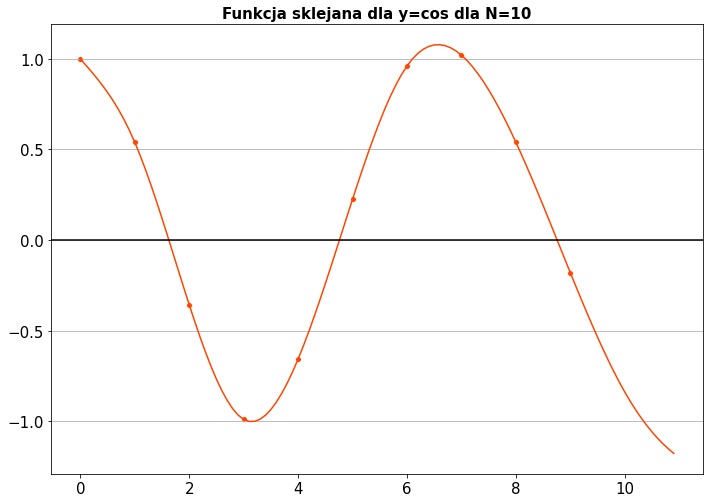

In [12]:
vis(fun=math.cos, sklejana=s_diff, N=10, m=1, p=p)